In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
import pandas as pd

In [24]:
image_path = fr"C:\Users\surri\PycharmProjects\ML_Assignment2\image.jpg" 
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load the image

In [17]:
image.shape

(480, 640)

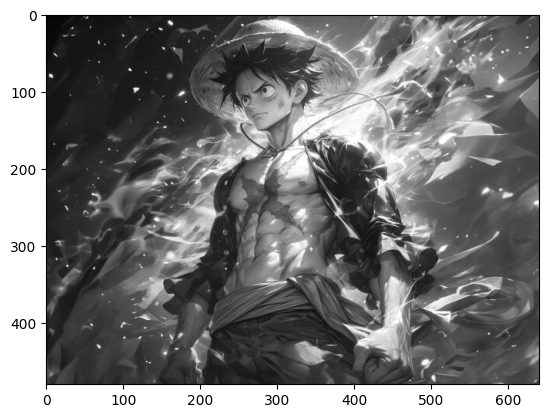

In [19]:
plt.imshow(image,cmap='gray')

In [20]:
image = cv2.resize(image,(300,300))

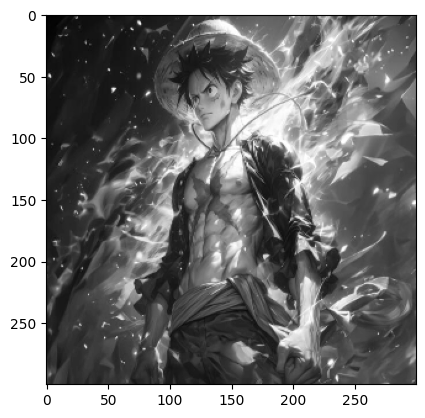

In [23]:
plt.imshow(image,cmap='gray')

In [27]:
def mask_image(img, prop):
    img = torch.from_numpy(img).float()
    img_copy = img.clone()
    mask = torch.rand(img.shape) < prop
    img_copy[mask] = float('nan')
    return img_copy, mask

In [28]:
masked_img = mask_image(image, 0.3)

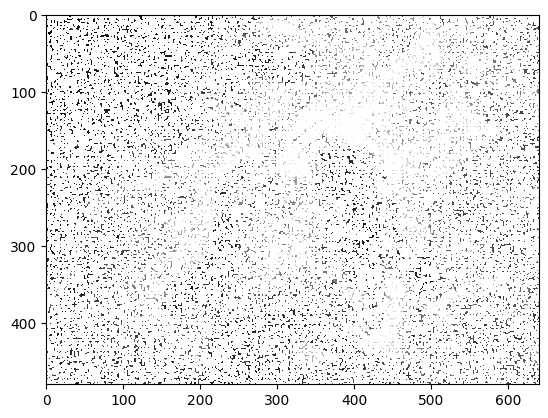

In [29]:
plt.imshow(masked_img[0], cmap='gray')

In [74]:
def factorize(A, k, device=torch.device("cpu")):
    """Factorize the matrix D into A and B"""
    A = A.to(device)
    # Randomly initialize A and B
    W = torch.randn(A.shape[0], k, requires_grad=True, device=device)
    H = torch.randn(k, A.shape[1], requires_grad=True, device=device)
    # Optimizer
    optimizer = torch.optim.Adam([W, H], lr=0.01)
    mask = ~torch.isnan(A)
    # Train the model
    for i in range(1000):
        # Compute the loss
        diff_matrix = torch.mm(W, H) - A
        diff_vector = diff_matrix[mask]
        loss = torch.norm(diff_vector)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Backpropagate
        loss.backward()
        
        # Update the parameters
        optimizer.step()
        
    return W, H, loss

In [75]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [82]:
W, H, loss = factorize(masked_img[0], 150, device=device)

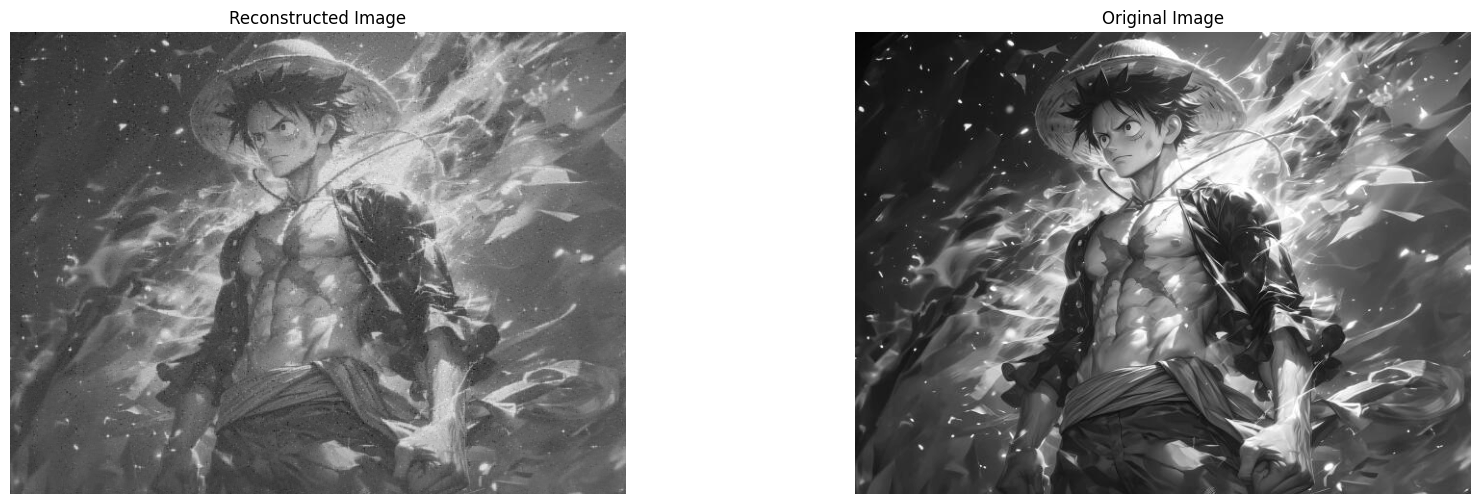

In [83]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.imshow(torch.mm(W,H).cpu().detach().numpy(),cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(image,cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

In [84]:
rmse = torch.sqrt(loss).mean()
psnr = 10 * torch.log10(255.0 / loss.mean())

In [85]:
print(f" RMSE = {rmse.cpu().detach().numpy()}, PSNR = {psnr.cpu().detach().numpy()}")

 RMSE = 42.78565216064453, PSNR = -8.560561180114746
